## [Simple linear regression](https://machinelearningmastery.com/simple-linear-regression-tutorial-for-machine-learning/) applied for prediction

### Description

Simple linear regression is a statistical method that studies the relationship between two variables:
* *x*: the predictor, explanatory, independent variable,
* *y*: the response, outcome, dependent variable.

### Definition

With simple linear regression the data is modeled as follows  
$y = \beta_0 + \beta_1 * x$  
where $\beta_0$ and $\beta_1$ are the coefficients we must estimate from the training data.

This model will define **the line that best fits the data**.

The best-fit line is the line that minimizes the sum of squares of vertical deviations between itself and the measured, given points. 

*Least-squares* approach: choose $\beta_0$ and $\beta_1$ to minimize the residual sum of squares (RSS)  
$RSS = \sum_{i=1}^{n}(y_i - \hat{y_i})^2 = \sum_{i=1}^{n}(y_i - \beta_0 - \beta_1 * x_i)^2$
where
* $x_i$ is the predictor value of the $i^{th}$ sample
* $y_i$ is the target value of the $i^{th}$ sample
* $\hat{y_i}$ is the model's predicted value for the $i^{th}$ sample.

To estimate these values, compute the partial derivatives of this sum with respect to both $\beta_0$ and $\beta_1$ individually, and set them each to zero.
* $\frac{\partial}{\partial\beta_0} RSS = 0$
* $\frac{\partial}{\partial\beta_1} RSS = 0$

Results from [calculus](https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf):  
* $\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})  (y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$  
* $\beta_0 = \bar{y} - \beta_1 * \bar{x}$

where $\bar{x}$ and $\bar{y}$ represent the mean values of samples $x$ and $y$.

#### Visual for the least squares sum

Here's a small example of some random points and a random line drawn in a cartesian coordinate system:
* the $(x, y)$ random points represent the predictor-target variables
* the random line represents an attempt to the best-fit line.

The red lines connecting the blue points to the blue line represent the ammount of errors made by the model.  

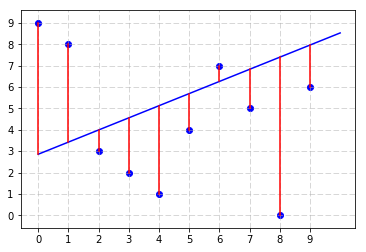

x=6 
 has associated target value y=7
 but the model predicted value y_hat=6.3


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_errors(n = 10, xmin=0, xmax=10, ymin=0, ymax=10):
    # define random points
    x = random.sample(range(xmin, xmax), n)
    y = random.sample(range(ymin, ymax), n)

    # define a random line
    linex = np.linspace(xmin, xmax, 100)
    b = random.uniform(ymin, ymax/2)
    m = random.uniform(-1, 1)
    liney = b + m * linex

    plt.clf()
    plt.grid(linestyle='--', linewidth=0.5)
    plt.xticks(x)
    plt.yticks(y)
    plt.scatter(x, y, color='b')
    plt.plot(linex, liney, 'b')
    for i in range(n):
        xi = x[i]
        yi = y[i]
        yh = b + m * xi
        plt.plot([xi, xi], [yi, yh], 'r-')
    plt.show()
    
    return x[0], y[0], b, m
    
x0, y0, b, m = draw_errors()

# example of error
print("x={} \n has associated target value y={}".format(x0, y0))
print(" but the model predicted value y_hat={:.2}".format(b + m * x0))

### Applications

The predictive ability of the linear regression model is tested on two real datasets:
* [population vs profit made by a restaurant](https://www.kaggle.com/lalitsomnathe/population-profit/data): the profit increases with the number of customers
* people's [height vs weight](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights): as height increases the weight is expected to increase as well

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#### \#1: Population vs Profit

In [3]:
data = pd.read_csv(
    '/src/data/01_slr_population_vs_profit.csv', 
    names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


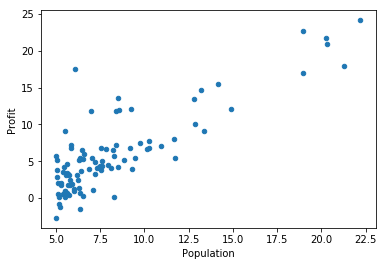

In [5]:
data.plot(kind='scatter', x='Population', y='Profit')

Use 'population' as the input variable and 'profit' as the target variable.  

In [6]:
x = data.Population.values
y = data.Profit.values

Write the function that estimates the model's coefficients.

In [7]:
def solve_linear_regression(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    deviation_x = (x - mean_x)
    deviation_y = (y - mean_y)
    beta1 = np.inner(deviation_x, deviation_y) / np.inner(deviation_x, deviation_x)
    beta0 = mean_y - beta1 * mean_x
    return beta0, beta1

Write the function that estimates the model's cost.

In [8]:
def compute_cost(x, y, beta0, beta1):
    lse = (y - beta0 - beta1 * x)**2
    return np.sum(lse) / (2 * len(x))

Write the function that plots the data points and their associated linear regression line.

In [9]:
def plot_data(x, y, beta0, beta1, xlabel='x', ylabel='y', size=7, alpha=0.4):
    lin_x = np.linspace(x.min(), x.max(), 100)
    f = beta0 + beta1 * lin_x

    plt.figure(figsize=(8,6))
    plt.clf()
    plt.plot(lin_x, f, 'r', label='Prediction')
    plt.scatter(x, y, s=size, alpha=alpha, label='Traning Data')
    plt.legend(loc=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title("{} vs {}".format(xlabel, ylabel))
    plt.show()

In [10]:
beta0, beta1 = solve_linear_regression(x, y)
print("Model's coefficients: beta0={}, beta1={}".format(beta0, beta1))

Model's coefficients: beta0=-3.8957808783118555, beta1=1.1930336441895941


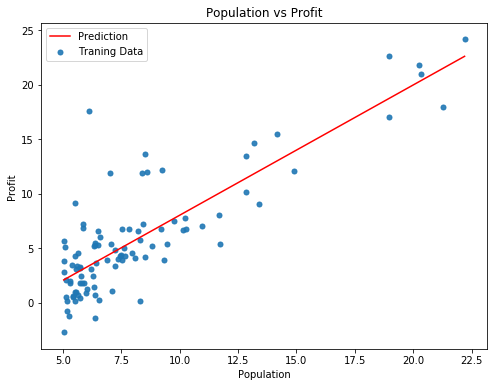

In [11]:
plot_data(x, y, beta0, beta1, 'Population', 'Profit', 25, 0.9)

In [12]:
compute_cost(x, y, beta0, beta1)

4.476971375975179

#### \#2 Heights vs Weights

In [13]:
data = pd.read_csv(
    '/src/data/01_slr_SOCR_height_weight_dataset.csv', 
    header=0, 
    names=['Height', 'Weight'])
data.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [14]:
data.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


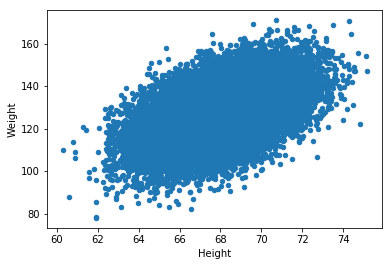

In [15]:
data.plot(kind='scatter', x='Height', y='Weight')

Split data into 80% training and 20% testing.

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
print("Training examples:\n{}".format(train[:5]))
print("Testing examples:\n{}".format(train[:5]))

Training examples:
         Height    Weight
3016   64.31223  132.5808
14849  68.52627  140.5210
21609  69.12286  121.6069
23901  70.80376  131.1233
3911   69.34915  126.2190
Testing examples:
         Height    Weight
3016   64.31223  132.5808
14849  68.52627  140.5210
21609  69.12286  121.6069
23901  70.80376  131.1233
3911   69.34915  126.2190


Use 'height' as the input variable and 'weight' as the target variable.  

In [17]:
x = train.Height.values
y = train.Weight.values

#### Solve the problem using sklearn's LinearRegression model

In [18]:
import sklearn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
beta0 = model.intercept_
beta1 = model.coef_[0]
print("Model's coefficients: b0={}, b1={}".format(beta0, beta1))

Model's coefficients: b0=-82.01554442802369, b1=3.075457599381411


Compare these values with the previous manual computations

In [19]:
beta0, beta1 = solve_linear_regression(x, y)
print("Model's coefficients: b0={}, b1={}".format(beta0, beta1))

Model's coefficients: b0=-82.01554442802355, b1=3.0754575993814086


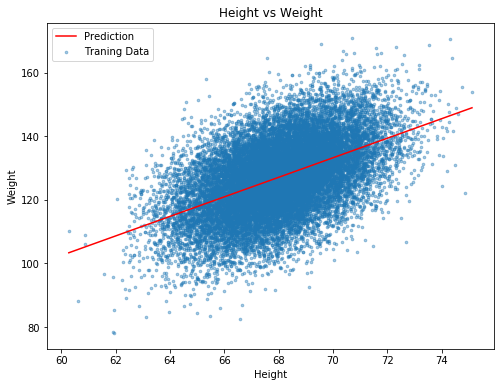

In [20]:
plot_data(x, y, beta0, beta1, "Height", "Weight")

#### Evaluate model performance

Use the [$R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination) regression score function to evaluate the predictive performance of the model.  
It evaluates the scatter of the data points around the fitted regression line.

The equation to compute $R^2$ is  
$R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y_i})^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$  
where 
* RSS is the residual sum of squares
* TSS is the total sum of squares
* $\bar{y}$ represents the mean of $y$ values.

The R-squared value generally lies between 0 and 1 (it can also be negative sometimes).  
Usually, the larger the $R^2$ (the closer to 1), the better the regression model fits your observations.  
More on how to interpret the R-squared values [here](http://statisticsbyjim.com/regression/interpret-r-squared-regression/).

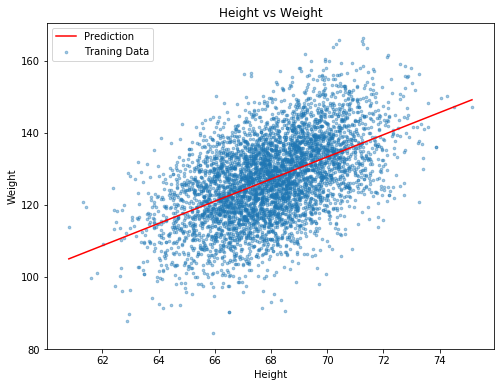

In [21]:
tx = test.Height.values
ty = test.Weight.values
plot_data(tx, ty, beta0, beta1, "Height", "Weight")

In [22]:
print("Model's predictive performance: r2={:.2f}".format(model.score(tx.reshape(-1, 1), ty)))

Model's predictive performance: r2=0.26
